In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

class SinDataset(Dataset):
    def __init__(self, x, included_timesteps, shift):
        """
        Initialize the dataset with the data.

        Args:
            data (list or array-like): List of numbers to use as data.
        """
        self.data = x
        self.included_timesteps = included_timesteps
        self.shift = shift

    def __len__(self):
        """
        Return the number of samples in the dataset.
        """
        return len(self.data)-self.included_timesteps

    def __getitem__(self, idx):
        """
        Fetch the data and its label at index `idx`.

        Args:
            idx (int): Index of the sample to retrieve.
        
        Returns:
            tuple: (data, label) where label is the square of the data.
        """
        x = np.sin(self.data[idx:idx+self.included_timesteps] + self.shift)  # Get the input data
        y = np.sin(self.data[idx+self.included_timesteps] + self.shift)         # Label is the square of the input
        return x, y


## Setting up data

In [ ]:
included_timesteps=50 # The numberof steps, the LSTM can look in the past
timeline = np.linspace(0, 100, 1000) # The range on which the dataset will be defined
x = SinDataset(timeline, included_timesteps, 0)
dataloader = DataLoader(x)

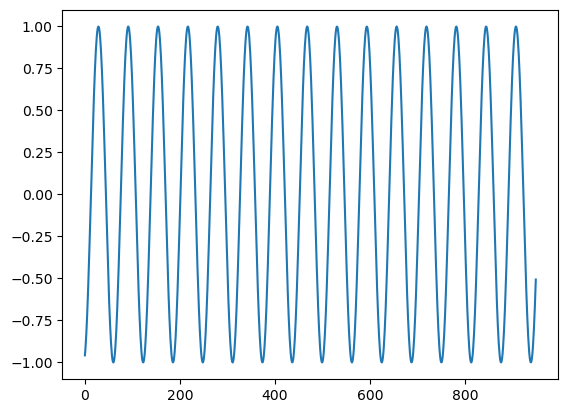

In [ ]:
x = [x for y, x in dataloader] # Plotting it for visual inspection
plt.plot(x)

## Setting up Network

In [ ]:
class Net(nn.Module):
    """"
    An LSTM followed by a fully connected layer
    
    Args:
        n_neurons: number of neurons in the lstm
        input_shape: number of features that are relevant for time series prediction, 1 in this notebook
    
    """
    def __init__(self, n_neurons, input_shape):
        super(Net, self).__init__()
        
        self.lstm = nn.LSTM(input_size=input_shape, hidden_size=n_neurons, batch_first=True)

        self.fc = nn.Linear(n_neurons, 1)
    
    def forward(self, x):
        _, (h_n1, _) = self.lstm(x)
        out = self.fc(h_n1)
        return out

In [ ]:
n_neurons = 12
epochs = 4

# Initialising model
model = Net(n_neurons, included_timesteps) # Included timesteps are defined above when we load the data
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)
loss_curve = []

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

for epoch in range(epochs):
    loss_total = 0
    model.train()

    for x, y in dataloader:
        optimizer.zero_grad()

        predictions = model(x.float()) # Float converts the input data to the corresponding format
        loss = loss_function(predictions, y.float())
        loss_total += loss.item()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch}: {loss_total=}')

Epoch 0: loss_total=38.795804539781045
Epoch 1: loss_total=8.379309407947126
Epoch 2: loss_total=8.88513233275
Epoch 3: loss_total=1.1808370830674981


## Making predictions

In [ ]:
# Checking the shape (Not important)
for x, y in dataloader:
    print(x.shape, y.shape)
    break

torch.Size([1, 50]) torch.Size([1])


In [56]:
# Loading first input
for x, y in dataloader:
    x1 = x
    break

In [57]:
model(x.float()).shape, x.shape, 

(torch.Size([1, 1]), torch.Size([1, 50]))

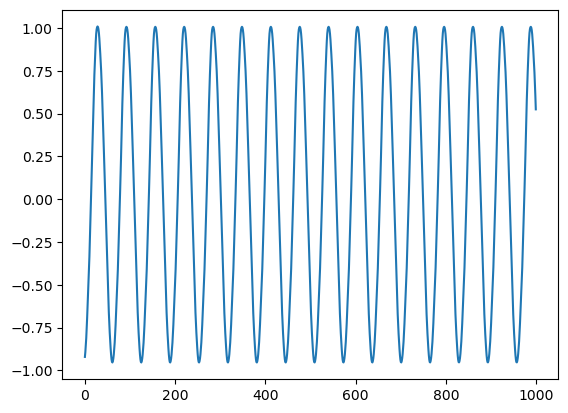

In [58]:
prediction = []
for n in range(1000):
  pred = model(x.float())
  y = torch.clone(x[:, 1:])
  new_x = pred.reshape((1, 1))
  x = torch.cat((y, new_x), axis=1)
  prediction.append(new_x[0, 0].detach().numpy())
  # plt.plot(x[0, :, 1].detach().numpy())

plt.plot(prediction)

Boom, thats what I call an LSTM

In [59]:
a = torch.tensor([1, 2])

In [65]:
a = a.reshape((1, 1, 2))

In [66]:
a[0, 0, :]

tensor([1, 2])